# ライブラリを使って機械学習を始めてみる

## 目次
- 機械学習のよくあるPDCA
- 直線関係のあるデータの可視化
- 線形回帰で回帰する
- 非線形な関数の回帰
- 手法の良さの評価
- 実際のデータとの違い

## 機械学習のよくあるPDCA
1. テキストデータやDBをPythonでロードする
2. ロードしたデータにバイナリ化などの処理を加えて、行列にロードする
3. 機械学習のモデルを使って、学習する
4. 予測をしてみる
5. 結果を可視化する
6. 誤差を定量的に測る
7. 特徴量を増減させたり、モデルを変えて、3〜6を繰り返す

今回は、この一連の流れを、ざっくりとやってみます。

## 直線関係のあるデータの可視化

In [33]:
%pylab inline
import numpy as np
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


まずは、Pylabの使い方として直線を引いてみる

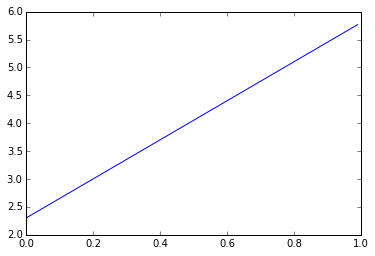

In [21]:
X = np.arange(0.0, 1.0, 0.01)
Y = 2.3 + X * 3.5
pl.plot(X, Y)

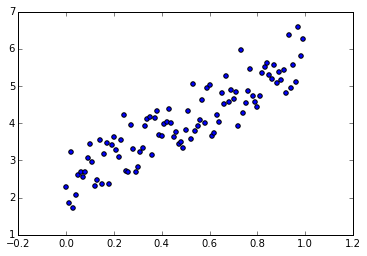

In [22]:
noise = np.random.normal(scale=0.5, size=X.shape)
Y =  2.3 + X * 3.5 + noise
pl.scatter(X, Y)

## 線形回帰で回帰する

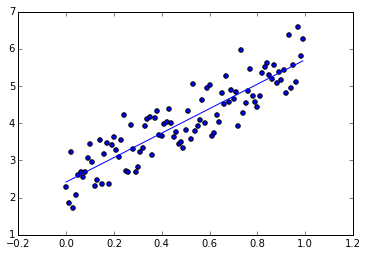

In [23]:
from sklearn.linear_model import LinearRegression

X_ = np.array([X]).T  # transform to fit sklearn-style-array

reg = LinearRegression()
reg.fit(X_, Y)
Y_pred = reg.predict(X_)

pl.plot(X, Y_pred)
pl.scatter(X, Y)

## 非線形な関係のあるデータの回帰

- numpyの関数を使って、適当に非線形なデータを初期化する(sin関数など)
- LinearRegressionを使って回帰をかけてみる
- LinearRegressionでないモデルを使って、回帰をかけてみる(RandomForest, SupportVectorRegressor, GradientBoostingなど)
- [Boston House Price Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) のようなリアルデータを使う

## 手法の良さを定量的に評価する

手法の良さを評価するとき、２つの観点が必要になる。

1. 「誤差」を定義すること
2. 汎化誤差が高いこと

回帰の場合、誤差は「平均二乗誤差」を使う

In [32]:
err = np.average((Y - Y_pred) ** 2)
err

0.22733104463065223

ただし、このような方法で評価すると、過学習したものの精度が高くなってしまうが、これは望んだ評価指標ではない。([PRMLの過学習の例](http://research.microsoft.com/en-us/um/people/cmbishop/prml/prmlfigs-png/Figure1.4d.png))

一般のユースケースを考えると、「過去のデータ」を使って学習し「未来のデータ」を予測したい。

そこで、データを「学習データ」と「テストデータ」にランダムに分割し、(例：学習データ80％、テストデータ20％)「学習データ」でfitし、「テストデータ」をpredictする。

また、より正確にはcross validationという手法を使う(パラメータチューニングのときなど)。

## 実際のデータと今回のテストデータの違い

今回のテストデータでは、

- 人間が人為的に決めた関数
- 正規分布に従うノイズを付与した
- Xが一次元

だが、実際のデータでは、

- どういう分布にしたがって発生するか、本当はわからない
- 100次元ぐらいあって、可視化できない
- リアルタイムにデータが増える
- データ量が多すぎて、リッチな手法が使えない
- 音声データとか画像データとか、ベクトルにすること自体難しい

といったことが発生する